In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/customer_purchases.csv')
print(df.head())

   CustomerID   Age  Gender    Country  AnnualIncome Membership  \
0           1  56.0     NaN        USA      29656.64        NaN   
1           2   NaN   Other  Australia      69806.83     Silver   
2           3  46.0     NaN     Canada           NaN     Silver   
3           4  32.0    Male      India      58637.81   Platinum   
4           5  60.0  Female    Germany      57697.68   Platinum   

   ItemsPurchased  TotalSpent  LastPurchaseDaysAgo  
0               9      397.52                  346  
1               6      511.64                  230  
2               6      197.28                  255  
3               2      119.71                  236  
4               3      160.33                   26  


In [4]:
print("Finding how many null values we do have")
print(df.isnull().sum())

Finding how many null values we do have
CustomerID              0
Age                    52
Gender                 57
Country                 0
AnnualIncome           52
Membership             57
ItemsPurchased          0
TotalSpent              0
LastPurchaseDaysAgo     0
dtype: int64


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['AnnualIncome'] = df['AnnualIncome'].fillna(df['AnnualIncome'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Membership'] = df['Membership'].fillna('Unknown')

"I filled numerical none values with mean and median. And filled categorical values with mode "

'I filled numerical none values with mean and median. And filled categorical values with mode '

In [10]:
df['Gender'] = df['Gender'].replace('Other', 'Male')

In [12]:
print(df['Gender'].value_counts())

Gender
Male      357
Female    143
Name: count, dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Membership_Encoded'] = le.fit_transform(df['Membership'])

df = pd.get_dummies(df, columns=['Country', 'Gender'], drop_first=True)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['AnnualIncome_scaled'] = scaler.fit_transform(df[['AnnualIncome']])

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['TotalSpent_norm'] = scaler.fit_transform(df[['TotalSpent']])

In [17]:
print(df.head())

   CustomerID        Age  AnnualIncome Membership  ItemsPurchased  TotalSpent  \
0           1  56.000000      29656.64    Unknown               9      397.52   
1           2  44.178571      69806.83     Silver               6      511.64   
2           3  46.000000      56673.07     Silver               6      197.28   
3           4  32.000000      58637.81   Platinum               2      119.71   
4           5  60.000000      57697.68   Platinum               3      160.33   

   LastPurchaseDaysAgo  Membership_Encoded  Country_Canada  Country_Germany  \
0                  346                   3           False            False   
1                  230                   2           False            False   
2                  255                   2            True            False   
3                  236                   1           False            False   
4                   26                   1           False             True   

   Country_India  Country_UK  Country_

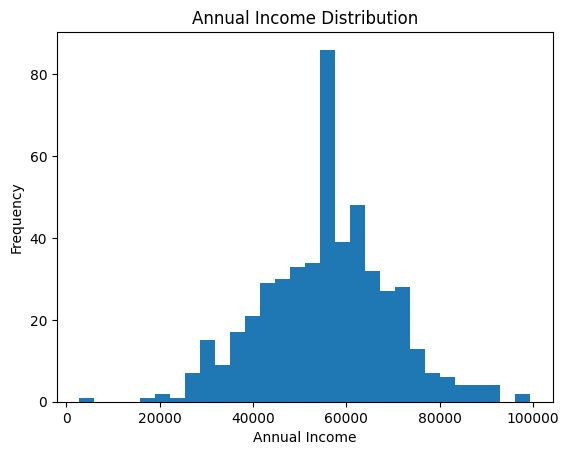

In [18]:
import matplotlib.pyplot as plt
plt.hist(df['AnnualIncome'], bins=30)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution')
plt.show()